In [5]:
#Importamos las bibliotecas a utilizar
import numpy as np 
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt

%matplotlib inline

**Ejercicio 1**. Defina las siguientes matrices. 

\

$$\begin{equation}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation}$$

\

$$\begin{equation}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation}$$

\

y la matrix identidad

\

$$\begin{equation}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation}$$

\

Calcule el resultado de $2I+3A+A@B$.

In [7]:
## La matriz A
A = np.array([[1,3],[-1,7]])
print('A=', A)
## La matriz B
B = np.array([[5,2],[1,2]])
print('B=', B)
## La matriz identidad
I = np.eye(2)
print('I=', I)

A= [[ 1  3]
 [-1  7]]
B= [[5 2]
 [1 2]]
I= [[1. 0.]
 [0. 1.]]


In [10]:
#cálculo de la ecuación 2*I +3*A +A@B 

R = 2*I + 3*A + A@B
print(R)

[[13. 17.]
 [-1. 35.]]


**Ejercicio 2**

Para demostrar el teorema de Cayley Hamilton, que toda matriz satisface su ecuación característica.

$$M, \det(M-\lambda I)=0$$

Definimos nuestra matriz M:

$$ M=\begin{bmatrix} a & b \\ c & d \end{bmatrix}, \det(M-\lambda I)=0 $$

$$ \det \begin{bmatrix} a & b \\ c & d \end{bmatrix} -\lambda \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}=0 $$

$$ \det \begin{bmatrix} a-\lambda & b \\ c & d-\lambda \end{bmatrix} = (a-\lambda)(d-\lambda)-(c)(b) = 0\lambda^2-\lambda(a+d)+(ad-cb)I=0 $$

Donde $\lambda$ no es nada más que nuestra matriz M, remplazamos:

$$ M^{2}= \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} a & b \\ c & d \end{bmatrix} = \begin{bmatrix} a^{2}+bc & ab+bd \\ ac+dc & cb+d^{2} \end{bmatrix}\\ \begin{bmatrix} a^{2}+bc & ab+bd \\ ac+dc & cb+d^{2} \end{bmatrix} -\begin{bmatrix} a & b \\ c & d \end{bmatrix}(a+d)+(ad-cb)\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} =0\\ \begin{bmatrix} a^{2}+bc & ab+bd \\ ac+dc & cb+d^{2} \end{bmatrix} - \begin{bmatrix} a^{2}+ad & ab+db \\ ac+dc & cd+d^{2} \end{bmatrix} + \begin{bmatrix} ad-ad & 0 \\ 0 & ad-cb \end{bmatrix} = \\ \begin{bmatrix} -ad+bc & 0 \\ 0 & -ad+bc \end{bmatrix} + \begin{bmatrix} ad-bc & 0 \\ 0 & ad-bc \end{bmatrix} = \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix} $$

In [23]:
a = float(input())
b = float(input())
c = float(input())
d = float(input())

M = np.array([[a,b],[c,d]])
if (a*d-b*c) != 0:
  p_M = I*la.det(M)-np.trace(M)*M+mpow(M,2)
  print("El polinomio caracteristico calculado mediante el teorema es igual a:")
  print("\n", p_M)
  print("Al ser la matriz cero, el teorema queda demostrado")
else:
  print("El determinante es igual a cero y el teorema no aplica")

2
6
7
1
El polinomio caracteristico calculado mediante el teorema es igual a:

 [[0. 0.]
 [0. 0.]]
Al ser la matriz cero, el teorema queda demostrado


**Ejercicio 3.** Resuelva el sistema de ecuaciones:

$$ x-3y+z=1 $$
$$ 3x-4y+z=5 $$
$$ 2y-z=0 $$

utilizando el método de eliminación Gaussiana y la función scipy.linalg.solve

In [26]:
# Definimos la Matriz
M = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(M)

# definimos a
a = np.array([1,5,0]).reshape(3,1)
print(b)

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]
[[1]
 [5]
 [0]]


In [27]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x = la.solve(M, a)
print(x)

[[3.]
 [2.]
 [4.]]


In [29]:
# Implementación del método de eliminación Gaussiana
# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [30]:
# Matriz aumentada: Unimos la matriz M con la matriz Identidad 
A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [31]:
#  L2 - 3 L1 ->  L2; 
A1 = add_row(A,-3,1,0)
print(A1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [32]:

#  1/5 L2 ->  L2; 
#  L1 + 3 L2 -> L1;
#  L3 - 2 L2 -> L3;
A2_2 = scale_row(A1,0.2,1)
A2_1 = add_row(A2_2,3,0,1)
A2 = add_row(A2_1,-2,2,1)
print(A2)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [33]:

#  -5 L3 ->  L3; 
#  L1 + 1 L3 -> L1;
#  L2 + 2 L3 -> L2;
A3_2 = scale_row(A2,-5,2)
A3_1 = add_row(A3_2,0.2,0,2)
A3 = add_row(A3_1,0.4,1,2)
print(A3)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17 -3.00000000e+00
   1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -6.00000000e+00
   2.00000000e+00 -5.00000000e+00]]


In [34]:
# Hemos obtenido la inversa
M_inv = A3[:,3:]
print(M_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [35]:
# El producto de M_inv @ M = I 
result = M_inv @ M
print(result)

[[ 1.00000000e+00  1.77635684e-15 -4.44089210e-16]
 [-4.44089210e-16  1.00000000e+00 -4.44089210e-16]
 [-8.88178420e-16  3.55271368e-15  1.00000000e+00]]


In [36]:
# Checamos la inversa de M con la función 'la.inv(M)'
la.inv(M)

array([[-2.,  1., -1.],
       [-3.,  1., -2.],
       [-6.,  2., -5.]])

In [38]:
# La solución es:
x = M_inv @ a 
print(x)

[[3.]
 [2.]
 [4.]]


**Ejercicio 4.**

In [39]:
# Definimos las matrices
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

print('B1:')
print(B1)
print('B2:')
print(B2)
print('B3:')
print(B3)

B1:
[[2 0 0]
 [0 3 4]
 [0 4 9]]
B2:
[[0 1 0]
 [0 0 1]
 [1 0 0]]
B3:
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [50]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()

# Matriz 1
eigvals1, eigvecs1 = la.eig(B1)
print('Eigenvalores B1:')
print(np.round(eigvals1,2))
print('Eigenvectores B1:')
print(np.round(eigvecs1,2))
print('')

# Matriz 2
eigvals2, eigvecs2 = la.eig(B2)
print('Eigenvalores B2:')
print(np.round(eigvals2,2))
print('Eigenvectores B2:')
print(np.round(eigvecs2,2))
print('')

# Matriz 3
eigvals3, eigvecs3 = la.eig(B3)
print('Eigenvalores B3:')
print(np.round(eigvals3,2))
print('Eigenvectores B3:')
print(np.round(eigvecs3,2))

Eigenvalores B1:
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B1:
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]

Eigenvalores B2:
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Eigenvectores B2:
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]

Eigenvalores B3:
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores B3:
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]


**Actividad 5.**

In [48]:
# Tenemos un total de 8 puntos donde realizaremos una interpolacion con un polinomio de grado 7 donde
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
y = np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

# Nuestra matriz para la variable x será
X = np.column_stack([x**k for k in range(0,8)])

## La solución para la ecuación Xa=y usando spicy.linalg==la
e = la.solve(X,y)
print(e)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


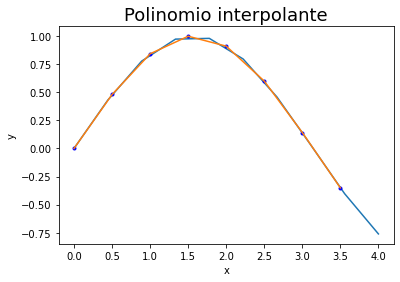

In [49]:
# Graficamos los resultados del polinomio interpolante de coeficientes a[0], a[1], y a[2]
# Sobreponemos en la gráfica los puntos conocidos en azul con puntos ('b.')
xs = np.linspace(0,4,10)
ys_temp = 0
for n in range(0,8):
  ys = ys_temp + e[n]*xs**n
  ys_temp = ys
plt.plot(xs,ys,x,y,'b.', x, np.sin(x))
plt.title('Polinomio interpolante', size=18)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Ejercicio 6.** Ejercicio 6. Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

In [52]:
# Volvemos a cargar las bibliotecas
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
# Tomar datos del url en formato "raw"
url = 'https://raw.githubusercontent.com/RaulACortez/FisicaComputacional1/main/FisicaComputacional1/Actividad1/ClimatologiaDiariaSantaAna.txt'
 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_ana = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_ana0 = df_ana.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_ana1 = df_ana0.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_ana1[cols] = pd.to_numeric(df_ana0[cols], errors='coerce')

# Definimos un nuevo dataframe por si hay que regresarse
df_ana2 = df_ana1.copy()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_ana2['Fecha'] = pd.to_datetime(df_ana2['Fecha'], dayfirst=True).copy()

# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_ana2['Año'] = df_ana2['Fecha'].dt.year
df_ana2['Mes'] = df_ana2['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_meteoana = df_ana2.copy()

# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_meteoana.drop('Mes', axis=1, inplace=True)
df_meteoana['Mes'] = df_meteotkt['Fecha'].dt.strftime('%b')

# Nueva copia del DataFrame para Series de Tiempo
df_meteoana_ts = df_meteoana.copy()

# Reemplazamos el índice por la variable 'Fecha' 
df_meteoana_ts = df_meteoana.set_index('Fecha')

# Seleccionaremos un conjunto de años de 30 años
df_86 = df_meteoana_ts[(df_meteoana_ts['Año'] >= 1986) & (df_meteoana_ts['Año'] < 2016)]

In [70]:
ts_test_TMX = df_86.Tmax
decomposition_TMX = sm.tsa.seasonal_decompose(ts_test_TMX.interpolate(), model='additive', freq=365)

# La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend_TMX = decomposition_TMX.trend
trend_TMX = trend_TMX[~np.isnan(trend_TMX)]
print(trend_TMX)

Fecha
1988-05-19    31.238356
1988-05-20    31.249315
1988-05-21    31.260274
1988-05-22    31.268493
1988-05-23    31.260274
                ...    
2015-06-28    30.941096
2015-06-29    30.949315
2015-06-30    30.976712
2015-07-01    30.990411
2015-07-02    31.006849
Name: Tmax, Length: 8478, dtype: float64


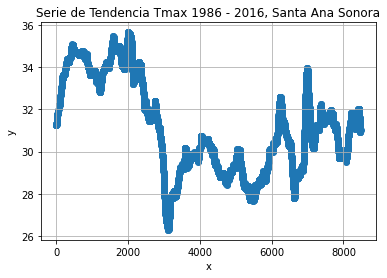

In [71]:
N = 8478
x = np.arange(0,N)
y = trend_TMX
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia Tmax 1986 - 2016, Santa Ana Sonora')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [72]:
# Construimos la matriz de Vandermonde
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)
# Imprimimos los primeros 5 renglones para verificar
print(X[:5,:])

Shape: (8478, 2)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [73]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[ 3.32752414e+01 -4.97981542e-04]


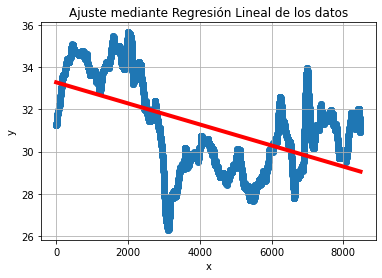

In [74]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,N,20)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [75]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_test_TMN = df_86.Tmin
decomposition_TMN = sm.tsa.seasonal_decompose(ts_test_TMN.interpolate(), model='additive', freq=365)

# La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend_TMN = decomposition_TMN.trend
trend_TMN = trend_TMN[~np.isnan(trend_TMN)]
print(trend_TMN)

Fecha
1988-05-19    15.216438
1988-05-20    15.224658
1988-05-21    15.238356
1988-05-22    15.263014
1988-05-23    15.268493
                ...    
2015-06-28    17.538356
2015-06-29    17.538356
2015-06-30    17.546575
2015-07-01    17.571233
2015-07-02    17.579452
Name: Tmin, Length: 8478, dtype: float64


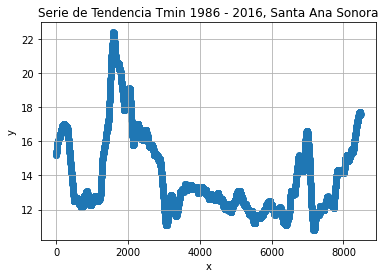

In [76]:
N = 8478
x = np.arange(0,N)
y = trend_TMN
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia Tmin 1986 - 2016, Santa Ana Sonora')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [77]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[ 1.53451301e+01 -3.32415669e-04]


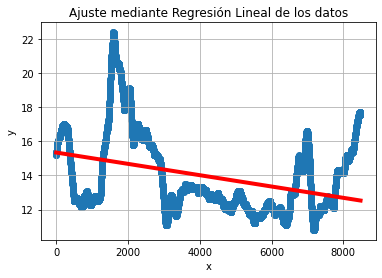

In [78]:
xs = np.linspace(0,N,20)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()